###Importando Libs

In [20]:
# Gráficos
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importando Dataset do Drive
from google.colab import drive, files
import pandas as pd

#Treinamento e avaliação de métricas
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, roc_curve, auc, confusion_matrix, precision_recall_curve, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from collections import Counter

# Metodos de balanceamento
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler

#link para documentação https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### Importando dados de teste e treino

Substitua esse código para conseguir importar o dataset do seu drive ou localmente.

In [3]:
drive.mount('/content/drive')

train_data = pd.read_csv('/content/drive/MyDrive/ia/lending/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/ia/lending/test.csv')

Mounted at /content/drive


##### Dando uma olhada no Head

In [4]:
pd.set_option('display.max_columns', None)
train_data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.961959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.044001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001128,NaN,0
1,0.433333,2.025665e-06,0.036896,NaN,0.202035,0.0,1.487062e-07,0.863415,0.333333,0.435244,0.006466,NaN,0.041198,0.018891,0.000652,0.087470,NaN,0.065108,0.109073,0.433333,4.577322e-07,0.900587,0.0,0.535211,0.011363,0.011356,1.081000e-07,0.281690,0.022451,3.468532e-06,0.013128,0.159992,NaN,0.007222,0.092705,4.335154e-07,0.359848,0.013083,0.001564,NaN,0.004106,0.035440,0.002112,0.022365,8.255450e-07,NaN,0.009,0.500000,1.256651e-06,0.0,0.250000,NaN,0.004409,0.016618,3.786029e-07,0.001540,NaN,1.599900e-06,0.000000,NaN,0.000000,1
2,0.600000,1.503073e-02,0.064639,NaN,0.096657,0.0,1.478698e-07,0.954888,0.633333,0.382166,0.130769,NaN,0.035181,0.001299,0.007083,0.046034,NaN,0.003686,0.002722,0.533333,2.430092e-02,0.955168,0.0,0.866889,0.000543,0.046924,4.131000e-07,0.119800,0.001072,6.233016e-08,0.039583,0.005809,NaN,0.006240,0.000000,6.609240e-08,0.000000,0.019765,0.004882,NaN,0.000255,0.001411,0.015206,0.133405,6.426537e-07,NaN,0.000,0.109375,1.526074e-03,0.0,0.008929,NaN,0.000807,0.013685,1.074924e-07,0.000770,NaN,5.333333e-01,0.000702,NaN,0.000000,1
3,0.333333,1.555804e-07,0.056000,NaN,0.055959,0.0,1.120742e-07,0.512857,0.333333,0.382166,0.003960,NaN,0.007930,0.005359,0.000889,0.024500,NaN,0.195780,0.113267,0.333333,6.926119e-08,0.667101,0.0,0.655172,0.002567,0.005572,8.440000e-08,0.224138,0.005071,7.813809e-07,0.001085,0.009990,NaN,0.009873,0.001520,0.000000e+00,0.032468,0.004109,0.000126,NaN,0.000723,0.005215,0.001373,0.067095,1.626300e-07,NaN,0.000,0.142857,3.860662e-07,0.0,0.058824,NaN,0.000000,0.006843,1.839721e-07,0.000257,NaN,9.990000e-08,0.000379,NaN,0.066667,0
4,0.833333,8.325896e-07,0.090909,NaN,0.211483,0.0,3.115530e-07,0.873213,0.666667,0.433121,0.080417,NaN,0.038021,0.000758,0.006194,0.028016,NaN,0.079558,0.022815,0.766667,4.542247e-07,0.940980,0.0,0.492851,0.003835,0.016040,4.182000e-07,0.495374,0.004060,1.350992e-06,0.026449,0.021990,NaN,0.005419,0.013678,1.739930e-07,0.001711,0.017074,0.004216,NaN,0.000378,0.001591,0.062196,0.078278,6.910218e-07,NaN,0.000,0.433628,1.069284e-07,0.0,0.004695,NaN,0.001829,0.024438,8.865658e-08,0.000513,0.000002,4.699000e-07,0.000001,NaN,0.000000,1


# Treinando o modelo de regressão logística

## Combinação Mediana e 0

#### Tratando Nulos

In [5]:
from sklearn.impute import SimpleImputer

# Parâmetros para concentração de valores e limite de NaN
concentration_threshold = 0.1  # Limite para considerar valores concentrados perto de zero (exemplo: 10% do valor absoluto)
nan_threshold = 0.3  # Limite de NaN para considerar a substituição da coluna inteira (ex: 30%)

# Criar o imputer para substituir NaN pela mediana, sem ajustar ainda com os dados
imputer = SimpleImputer(strategy='median')

# Iterar sobre cada coluna do DataFrame de treino
for col in train_data.columns:
    # Verificar a proporção de NaN na coluna de treino
    nan_proportion = train_data[col].isna().mean()

    # Verificar a concentração de valores perto de zero no treino
    near_zero_proportion = (abs(train_data[col]) < concentration_threshold).mean()

    # Se a coluna tem muitos NaN e valores concentrados perto de zero, substituímos por 0
    if nan_proportion > nan_threshold and near_zero_proportion > 0.9:  # >90% dos valores estão perto de zero
        train_data[col] = 0
        test_data[col] = 0  # Aplicar a mesma transformação no conjunto de teste
        print(f"Coluna '{col}' substituída por 0 devido à alta concentração de valores perto de zero e muitos NaN.")
    else:
        # Caso contrário, ajustar o imputer no treino e transformar os NaN
        train_data[[col]] = imputer.fit_transform(train_data[[col]])
        # Aplicar a transformação no conjunto de teste sem ajustar novamente o imputer
        test_data[[col]] = imputer.transform(test_data[[col]])

# Verificar se os NaNs foram substituídos no conjunto de treino e teste
print("Verificação das substituições de NaN:")
for col in train_data.columns:
    nan_count_after_train = train_data[col].isna().sum()
    nan_count_after_test = test_data[col].isna().sum()
    print(f"Coluna '{col}': {nan_count_after_train} NaNs restantes no treino, {nan_count_after_test} NaNs restantes no teste.")



Verificação das substituições de NaN:
Coluna 'x0': 0 NaNs restantes no treino, 0 NaNs restantes no teste.
Coluna 'x1': 0 NaNs restantes no treino, 0 NaNs restantes no teste.
Coluna 'x2': 0 NaNs restantes no treino, 0 NaNs restantes no teste.
Coluna 'x3': 0 NaNs restantes no treino, 0 NaNs restantes no teste.
Coluna 'x4': 0 NaNs restantes no treino, 0 NaNs restantes no teste.
Coluna 'x5': 0 NaNs restantes no treino, 0 NaNs restantes no teste.
Coluna 'x6': 0 NaNs restantes no treino, 0 NaNs restantes no teste.
Coluna 'x7': 0 NaNs restantes no treino, 0 NaNs restantes no teste.
Coluna 'x8': 0 NaNs restantes no treino, 0 NaNs restantes no teste.
Coluna 'x9': 0 NaNs restantes no treino, 0 NaNs restantes no teste.
Coluna 'x10': 0 NaNs restantes no treino, 0 NaNs restantes no teste.
Coluna 'x11': 0 NaNs restantes no treino, 0 NaNs restantes no teste.
Coluna 'x12': 0 NaNs restantes no treino, 0 NaNs restantes no teste.
Coluna 'x13': 0 NaNs restantes no treino, 0 NaNs restantes no teste.
Coluna

#### Separando teste e treinamento

In [6]:
X_treino = train_data.drop('y', axis=1)
y_treino = train_data['y']
X_teste = test_data.drop('y', axis=1)
y_teste = test_data['y']

### Definindo os hiperparâmetros e treinando o modelo

In [7]:
# Configurar e treinar o modelo de regressão logística
logistica = LogisticRegression(random_state=1, max_iter=300, penalty="l2", tol=0.001, C=1, solver="liblinear")

# Treinar o modelo
logistica.fit(X_treino, y_treino)

LogisticRegression(C=1, max_iter=300, random_state=1, solver='liblinear',
                   tol=0.001)

#### Avaliando o modelo no conjunto de treino

In [8]:
# 5. Avaliar o modelo no conjunto de treino

previsoes_treino = logistica.predict(X_treino)

# Acurácia no treino
acuracia_treino = accuracy_score(y_treino, previsoes_treino)
print("Acurácia no Treino: %.2f%%" % (acuracia_treino * 100.0))

Acurácia no Treino: 86.10%


In [9]:
# Matriz de confusão no treino
print("Matriz de Confusão (Treino):")
print(confusion_matrix(y_treino, previsoes_treino))

Matriz de Confusão (Treino):
[[  2264  19593]
 [  1542 128639]]


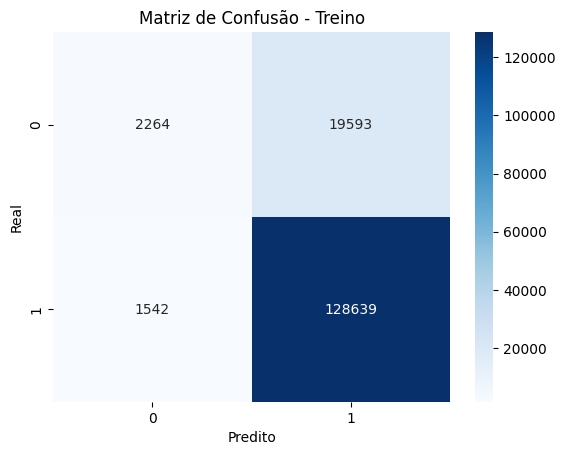

In [10]:
cm = confusion_matrix(y_treino, previsoes_treino)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Treino')
plt.show()

#### Avaliando modelo no conjunto de teste

In [11]:
# 6. Fazer previsões no conjunto de teste

previsoes_teste = logistica.predict(X_teste)

# Acurácia no teste
acuracia_teste = accuracy_score(y_teste, previsoes_teste)
print("Acurácia no Teste: %.2f%%" % (acuracia_teste * 100.0))

Acurácia no Teste: 79.65%


AUC: 0.71


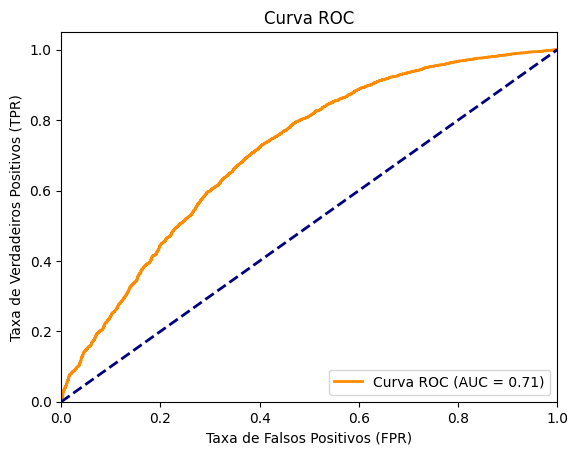

In [12]:
previsoes_prob_teste = logistica.predict_proba(X_teste)[:, 1]  # Pega as probabilidades para a classe positiva (classe 1)

# Calcular a curva ROC
fpr, tpr, _ = roc_curve(y_teste, previsoes_prob_teste)

# Calcular a AUC
roc_auc = auc(fpr, tpr)

# Exibir o valor da AUC
print("AUC: %.2f" % roc_auc)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Linha diagonal de chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [13]:
# Matriz de confusão no teste
print("Matriz de Confusão (Teste):")
print(confusion_matrix(y_teste, previsoes_teste))

Matriz de Confusão (Teste):
[[ 524 1864]
 [ 323 8035]]


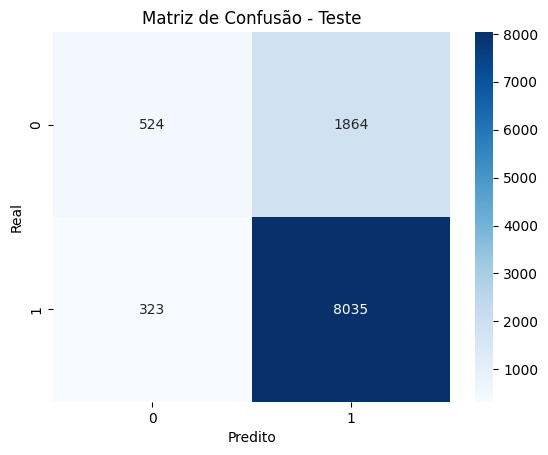

In [14]:
cm = confusion_matrix(y_teste, previsoes_teste)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Teste')
plt.show()

In [15]:
# Classification Report no teste
print("Relatório de Classificação (Teste):")
print(classification_report(y_teste, previsoes_teste))

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

         0.0       0.62      0.22      0.32      2388
         1.0       0.81      0.96      0.88      8358

    accuracy                           0.80     10746
   macro avg       0.72      0.59      0.60     10746
weighted avg       0.77      0.80      0.76     10746



#### Ajustando threshold

In [16]:
# Obter as probabilidades
y_prob = logistica.predict_proba(X_teste)[:, 1]

# Ajustar o threshold
threshold = 0.78  # Defina o valor desejado para o threshold
y_pred = (y_prob >= threshold).astype(int)

# Gerar a matriz de confusão
matriz_confusao = confusion_matrix(y_teste, y_pred)
print("Matriz de Confusão:\n", matriz_confusao)

# Avaliar a acurácia (opcional)
print(classification_report(y_teste, y_pred))


Matriz de Confusão:
 [[1537  851]
 [2743 5615]]
              precision    recall  f1-score   support

         0.0       0.36      0.64      0.46      2388
         1.0       0.87      0.67      0.76      8358

    accuracy                           0.67     10746
   macro avg       0.61      0.66      0.61     10746
weighted avg       0.76      0.67      0.69     10746



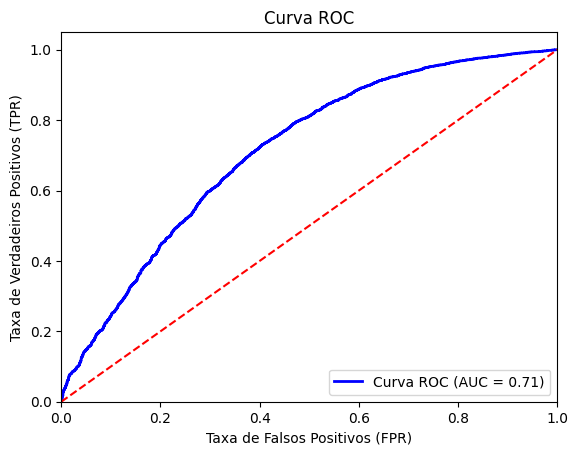

In [17]:
# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_teste, y_prob)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Linha aleatória
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

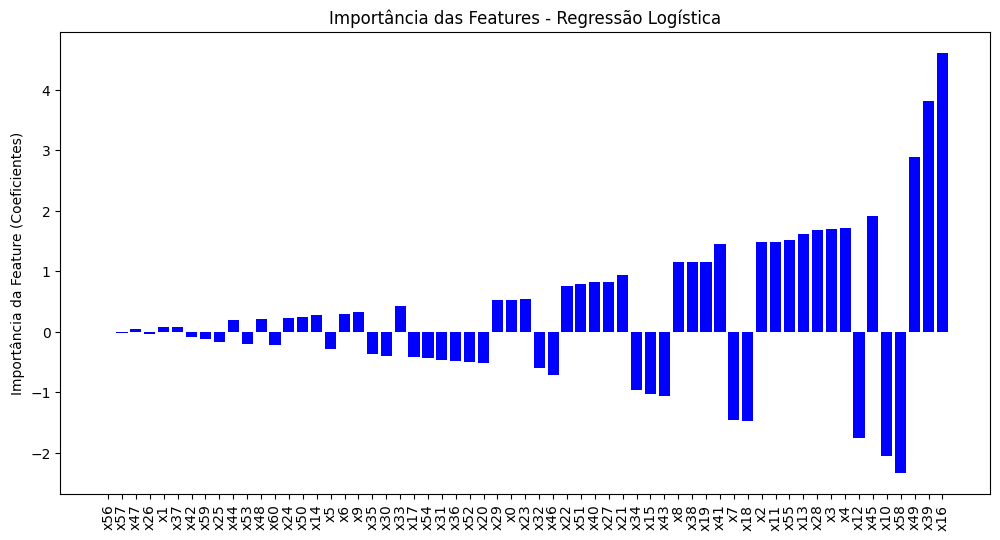

In [18]:
# Extração da importância das features
feature_importance = logistica.coef_[0]  # Coeficientes do modelo para a regressão logística

# Ordenar por importância
indices = np.argsort(abs(feature_importance))[::-1]
sorted_importance = feature_importance[indices]

# Nomes das features (substitua pelos seus)
feature_names = [f'x{i}' for i in range(X_treino.shape[1])]
sorted_feature_names = np.array(feature_names)[indices]

# Criar um gráfico de barras vertical com os valores de importância no eixo Y e as features no eixo X
plt.figure(figsize=(12, 6))
plt.bar(sorted_feature_names[::-1], sorted_importance[::-1], color='blue')
plt.ylabel('Importância da Feature (Coeficientes)')
plt.xticks(rotation=90)  # Rotação dos labels no eixo X para melhor visualização
plt.title('Importância das Features - Regressão Logística')
plt.show()

# Usando Smote

In [23]:
X_treino = train_data.drop('y', axis=1)
y_treino = train_data['y']
X_teste = test_data.drop('y', axis=1)
y_teste = test_data['y']

In [24]:
# Aplicar SMOTE para oversampling da classe minoritária
smote = SMOTE(sampling_strategy=0.3, random_state=42)
X_smote, y_smote = smote.fit_resample(X_treino, y_treino)
print(f"Distribuição após o SMOTE: {Counter(y_smote)}")

Distribuição após o SMOTE: Counter({1.0: 130181, 0.0: 39054})


### Definindo os hiperparâmetros e treinando o modelo

In [25]:
# Configurar e treinar o modelo de regressão logística
logistica = LogisticRegression(random_state=1, max_iter=300, penalty="l2", tol=0.001, C=1, solver="liblinear")

# Treinar o modelo
logistica.fit(X_smote, y_smote)

LogisticRegression(C=1, max_iter=300, random_state=1, solver='liblinear',
                   tol=0.001)

#### Avaliando o modelo no conjunto de treino

In [40]:
# 5. Avaliar o modelo no conjunto de treino

previsoes_treino = logistica.predict(X_smote)

# Acurácia no treino
acuracia_treino = accuracy_score(y_smote, previsoes_treino)
print("Acurácia no Treino: %.2f%%" % (acuracia_treino * 100.0))

Acurácia no Treino: 79.10%


In [42]:
# Matriz de confusão no treino
print("Matriz de Confusão (Treino):")
print(confusion_matrix(y_smote, previsoes_treino))

Matriz de Confusão (Treino):
[[  8207  30847]
 [  4520 125661]]


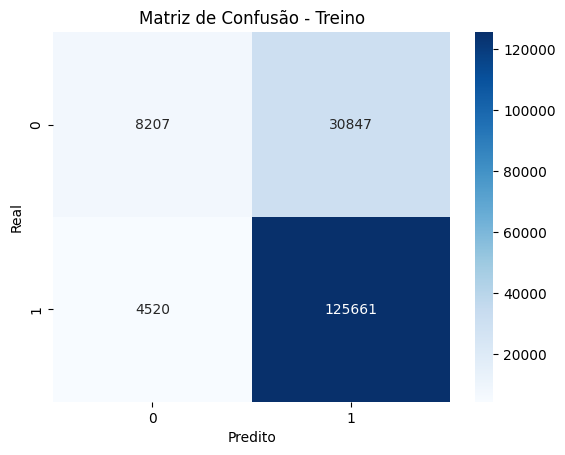

In [44]:
cm = confusion_matrix(y_smote, previsoes_treino)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Treino')
plt.show()

#### Avaliando modelo no conjunto de teste

In [29]:
# 6. Fazer previsões no conjunto de teste

previsoes_teste = logistica.predict(X_teste)

# Acurácia no teste
acuracia_teste = accuracy_score(y_teste, previsoes_teste)
print("Acurácia no Teste: %.2f%%" % (acuracia_teste * 100.0))

Acurácia no Teste: 77.95%


AUC: 0.71


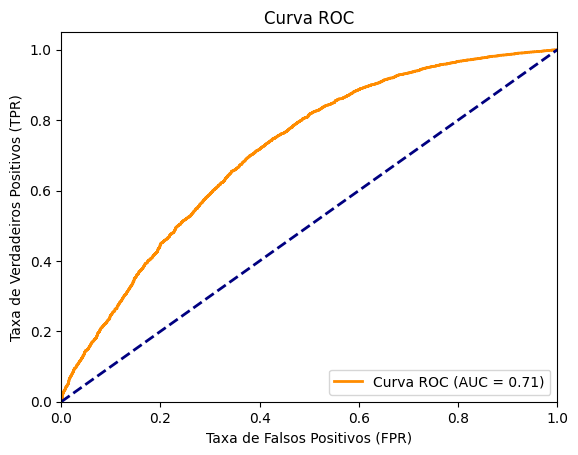

In [30]:
previsoes_prob_teste = logistica.predict_proba(X_teste)[:, 1]  # Pega as probabilidades para a classe positiva (classe 1)

# Calcular a curva ROC
fpr, tpr, _ = roc_curve(y_teste, previsoes_prob_teste)

# Calcular a AUC
roc_auc = auc(fpr, tpr)

# Exibir o valor da AUC
print("AUC: %.2f" % roc_auc)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Linha diagonal de chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [31]:
# Matriz de confusão no teste
print("Matriz de Confusão (Teste):")
print(confusion_matrix(y_teste, previsoes_teste))

Matriz de Confusão (Teste):
[[ 951 1437]
 [ 933 7425]]


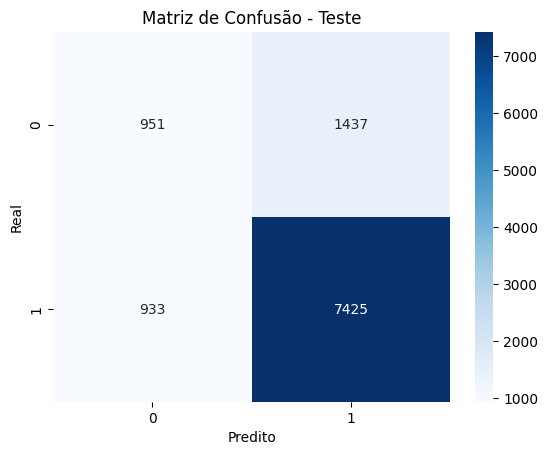

In [32]:
cm = confusion_matrix(y_teste, previsoes_teste)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Teste')
plt.show()

In [33]:
# Classification Report no teste
print("Relatório de Classificação (Teste):")
print(classification_report(y_teste, previsoes_teste))

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

         0.0       0.50      0.40      0.45      2388
         1.0       0.84      0.89      0.86      8358

    accuracy                           0.78     10746
   macro avg       0.67      0.64      0.65     10746
weighted avg       0.76      0.78      0.77     10746



#### Ajustando threshold

In [39]:
# Obter as probabilidades
y_prob = logistica.predict_proba(X_teste)[:, 1]

# Ajustar o threshold
threshold = 0.6  # Defina o valor desejado para o threshold
y_pred = (y_prob >= threshold).astype(int)

# Gerar a matriz de confusão
matriz_confusao = confusion_matrix(y_teste, y_pred)
print("Matriz de Confusão:\n", matriz_confusao)

# Avaliar a acurácia (opcional)
print(classification_report(y_teste, y_pred))


Matriz de Confusão:
 [[1281 1107]
 [1852 6506]]
              precision    recall  f1-score   support

         0.0       0.41      0.54      0.46      2388
         1.0       0.85      0.78      0.81      8358

    accuracy                           0.72     10746
   macro avg       0.63      0.66      0.64     10746
weighted avg       0.76      0.72      0.74     10746



# Smote + Undersample

In [ ]:
X_treino = train_data.drop('y', axis=1)
y_treino = train_data['y']
X_teste = test_data.drop('y', axis=1)
y_teste = test_data['y']

In [ ]:
# Aplicar SMOTE para oversampling da classe minoritária
smote = SMOTE(sampling_strategy=0.3, random_state=42)
X_smote, y_smote = smote.fit_resample(X_treino, y_treino)
print(f"Distribuição após o SMOTE: {Counter(y_smote)}")

Distribuição após o SMOTE: Counter({1.0: 130181, 0.0: 39054})


In [ ]:
# Aplicar RandomUnderSampler para reduzir a classe majoritária
undersample = RandomUnderSampler(sampling_strategy=0.6, random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_smote, y_smote)
print(f"Distribuição após o undersampling: {Counter(y_resampled)}")

### Definindo os hiperparâmetros e treinando o modelo

In [ ]:
# Configurar e treinar o modelo de regressão logística
logistica = LogisticRegression(random_state=1, max_iter=300, penalty="l2", tol=0.001, C=1, solver="liblinear")

# Treinar o modelo
logistica.fit(X_resampled, y_resampled)

LogisticRegression(C=1, max_iter=300, random_state=1, solver='liblinear',
                   tol=0.001)

#### Avaliando o modelo no conjunto de treino

In [ ]:
# 5. Avaliar o modelo no conjunto de treino

previsoes_treino = logistica.predict(X_resampled)

# Acurácia no treino
acuracia_treino = accuracy_score(y_resampled, previsoes_treino)
print("Acurácia no Treino: %.2f%%" % (acuracia_treino * 100.0))

Acurácia no Treino: 85.70%


In [ ]:
# Matriz de confusão no treino
print("Matriz de Confusão (Treino):")
print(confusion_matrix(y_resampled, previsoes_treino))

Matriz de Confusão (Treino):
[[  4633  17224]
 [  4520 125661]]


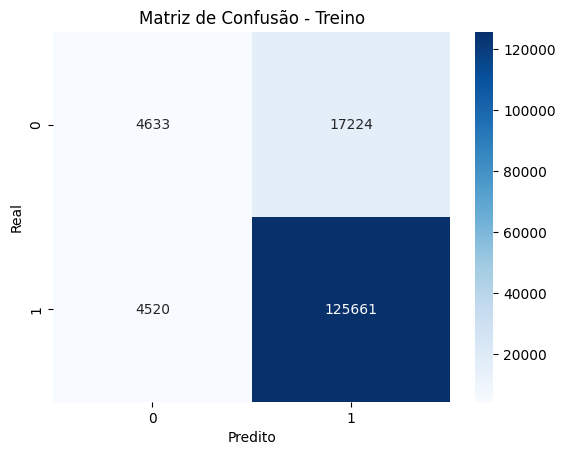

In [ ]:
cm = confusion_matrix(y_resampled, previsoes_treino)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Treino')
plt.show()

#### Avaliando modelo no conjunto de teste

In [ ]:
# 6. Fazer previsões no conjunto de teste

previsoes_teste = logistica.predict(X_teste)

# Acurácia no teste
acuracia_teste = accuracy_score(y_teste, previsoes_teste)
print("Acurácia no Teste: %.2f%%" % (acuracia_teste * 100.0))

Acurácia no Teste: 77.95%


AUC: 0.71


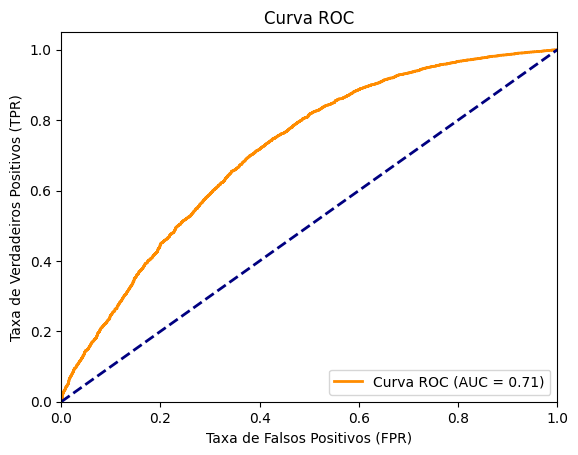

In [ ]:
previsoes_prob_teste = logistica.predict_proba(X_teste)[:, 1]  # Pega as probabilidades para a classe positiva (classe 1)

# Calcular a curva ROC
fpr, tpr, _ = roc_curve(y_teste, previsoes_prob_teste)

# Calcular a AUC
roc_auc = auc(fpr, tpr)

# Exibir o valor da AUC
print("AUC: %.2f" % roc_auc)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Linha diagonal de chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Matriz de confusão no teste
print("Matriz de Confusão (Teste):")
print(confusion_matrix(y_teste, previsoes_teste))

Matriz de Confusão (Teste):
[[ 951 1437]
 [ 933 7425]]


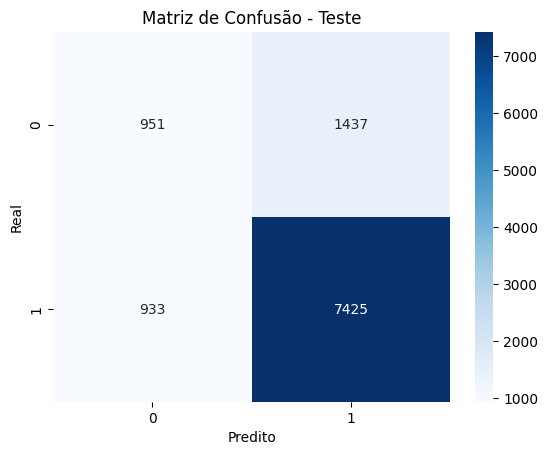

In [ ]:
cm = confusion_matrix(y_teste, previsoes_teste)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Teste')
plt.show()

In [ ]:
# Classification Report no teste
print("Relatório de Classificação (Teste):")
print(classification_report(y_teste, previsoes_teste))

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

         0.0       0.50      0.40      0.45      2388
         1.0       0.84      0.89      0.86      8358

    accuracy                           0.78     10746
   macro avg       0.67      0.64      0.65     10746
weighted avg       0.76      0.78      0.77     10746



#### Ajustando threshold

In [ ]:
# Obter as probabilidades
y_prob = logistica.predict_proba(X_teste)[:, 1]

# Ajustar o threshold
threshold = 0.6  # Defina o valor desejado para o threshold
y_pred = (y_prob >= threshold).astype(int)

# Gerar a matriz de confusão
matriz_confusao = confusion_matrix(y_teste, y_pred)
print("Matriz de Confusão:\n", matriz_confusao)

# Avaliar a acurácia (opcional)
print(classification_report(y_teste, y_pred))


Matriz de Confusão:
 [[1281 1107]
 [1852 6506]]
              precision    recall  f1-score   support

         0.0       0.41      0.54      0.46      2388
         1.0       0.85      0.78      0.81      8358

    accuracy                           0.72     10746
   macro avg       0.63      0.66      0.64     10746
weighted avg       0.76      0.72      0.74     10746



## GridSearch

In [ ]:
# Defina o espaço de hiperparâmetros
param_grid = {
    'max_iter': [100, 200, 300, 400, 500],
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'tol': [1e-3, 1e-4, 1e-5],
    'class_weight': [None]
}

log_reg = LogisticRegression()

# Inicialize o GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring='f1', cv=5, verbose=1, n_jobs=-1)

# Treine o modelo com Grid Search
grid_search.fit(X_treino, y_treino)

# Melhores hiperparâmetros e pontuação
print("Melhores Hiperparâmetros:", grid_search.best_params_)
print("Melhor Acurácia:", grid_search.best_score_)

# Teste o melhor modelo no conjunto de teste
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_teste, y_teste)
print("Acurácia no conjunto de teste:", accuracy)